# ניתוח נתוני מכירות למבורגיני 2020-2025

מחברת זו מנתחת את נתוני המכירות של למבורגיני בשנים 2020-2025 ומציגה תובנות באמצעות ויזואליזציות.

In [9]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [10]:
# ייבוא ספריות
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# הגדרות עיצוב
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
rcParams['figure.figsize'] = (14, 6)
rcParams['font.size'] = 10

# תמיכה בעברית (אופציונלי)
# plt.rcParams['font.family'] = 'Arial'

print("✓ כל הספריות נטעשו בהצלחה")

✓ כל הספריות נטעשו בהצלחה


In [24]:
# טעינת הנתונים
df = pd.read_csv('lamborghini_sales_2020_2025.csv')
print(f"נטענו {len(df)} שורות נתונים")
print(f"\nעמודות: {list(df.columns)}")

נטענו 54 שורות נתונים

עמודות: ['Model', 'Year', 'Region', 'Color', 'Fuel Type', 'Base Price (USD)', 'Horsepower', 'Sales Volume', 'Turbo (Yes/No)']


In [12]:
# הצגת השורות הראשונות
print("═" * 80)
print("הצצה ראשונה לנתונים:")
print("═" * 80)
df.head(10)

════════════════════════════════════════════════════════════════════════════════
הצצה ראשונה לנתונים:
════════════════════════════════════════════════════════════════════════════════


,Model,Year,Region,Color,Fuel Type,Base Price (USD),Horsepower,Sales Volume,Turbo (Yes/No)
0,Urus,2020,EMEA,Black,Gasoline,230000,641,4500,Yes
1,Urus,2020,Americas,White,Gasoline,240000,641,4800,Yes
2,Urus,2020,APAC,Red,Gasoline,235000,641,2700,Yes
3,Huracán,2020,EMEA,Yellow,Gasoline,260000,631,2500,Yes
4,Huracán,2020,Americas,Orange,Gasoline,270000,631,2600,Yes
5,Huracán,2020,APAC,Black,Gasoline,265000,631,1500,Yes
6,Aventador,2020,EMEA,Black,Gasoline,550000,769,600,Yes
7,Aventador,2020,Americas,White,Gasoline,560000,769,650,Yes
8,Aventador,2020,APAC,Red,Gasoline,555000,769,400,Yes
9,Urus,2021,EMEA,Silver,Gasoline,235000,641,5021,Yes


In [13]:
# מידע על הנתונים
print("═" * 80)
print("מידע כללי על הנתונים:")
print("═" * 80)
df.info()
print("\n" + "═" * 80)
print("בדיקת ערכים חסרים:")
print("═" * 80)
print(df.isnull().sum())

════════════════════════════════════════════════════════════════════════════════
מידע כללי על הנתונים:
════════════════════════════════════════════════════════════════════════════════
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Model             54 non-null     object
 1   Year              54 non-null     int64 
 2   Region            54 non-null     object
 3   Color             54 non-null     object
 4   Fuel Type         54 non-null     object
 5   Base Price (USD)  54 non-null     int64 
 6   Horsepower        54 non-null     int64 
 7   Sales Volume      54 non-null     int64 
 8   Turbo (Yes/No)    54 non-null     object
dtypes: int64(4), object(5)
memory usage: 3.9+ KB

════════════════════════════════════════════════════════════════════════════════
בדיקת ערכים חסרים:
═════════════════════════════════════════════════════════

In [14]:
# סטטיסטיקה תיאורית
print("═" * 80)
print("סטטיסטיקה תיאורית:")
print("═" * 80)
df.describe()

════════════════════════════════════════════════════════════════════════════════
סטטיסטיקה תיאורית:
════════════════════════════════════════════════════════════════════════════════


,Year,Base Price (USD),Horsepower,Sales Volume
count,54.000000,54.000000,54.000000,54.000000
mean,2022.500000,374722.222222,718.277778,2618.037037
std,1.723861,136293.304237,121.645234,1785.625201
min,2020.000000,230000.000000,631.000000,63.000000
25%,2021.000000,265000.000000,631.000000,1187.500000
50%,2022.500000,300000.000000,641.000000,2543.000000
75%,2024.000000,550000.000000,769.000000,3896.500000
max,2025.000000,590000.000000,1001.000000,6200.000000


In [15]:
# ניתוח קטגוריאלי
print("═" * 80)
print("ערכים ייחודיים בכל עמודה קטגוריאלית:")
print("═" * 80)
categorical_cols = ['Model', 'Region', 'Color', 'Fuel Type', 'Turbo (Yes/No)']
for col in categorical_cols:
    print(f"\n{col}: {df[col].nunique()} ערכים ייחודיים")
    print(df[col].value_counts())
    print("-" * 40)

════════════════════════════════════════════════════════════════════════════════
ערכים ייחודיים בכל עמודה קטגוריאלית:
════════════════════════════════════════════════════════════════════════════════

Model: 6 ערכים ייחודיים
Model
Huracán                15
Urus                   12
Aventador              12
Revuelto                6
Urus SE                 6
Huracán (Temerario)     3
Name: count, dtype: int64
----------------------------------------

Region: 3 ערכים ייחודיים
Region
EMEA        18
Americas    18
APAC        18
Name: count, dtype: int64
----------------------------------------

Color: 9 ערכים ייחודיים
Color
Black     16
White     11
Red        9
Orange     6
Yellow     5
Silver     3
Blue       2
Green      1
Grey       1
Name: count, dtype: int64
----------------------------------------

Fuel Type: 2 ערכים ייחודיים
Fuel Type
Gasoline    39
Hybrid      15
Name: count, dtype: int64
----------------------------------------

Turbo (Yes/No): 1 ערכים ייחודיים
Turbo (Yes/No)
Ye

## ויזואליזציות - ניתוח מכירות

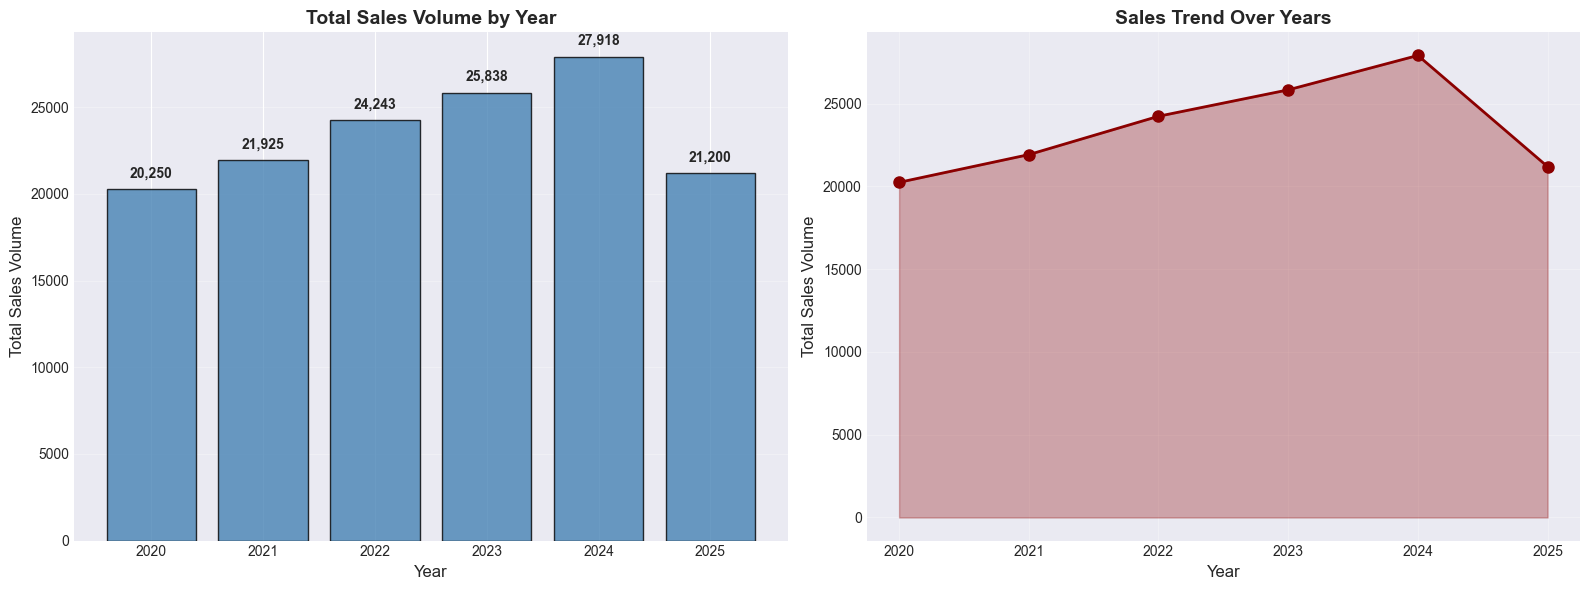


שיעור צמיחה כולל: 4.7%


In [16]:
# 1. סך המכירות לפי שנה
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# גרף עמודות
sales_by_year = df.groupby('Year')['Sales Volume'].sum()
axes[0].bar(sales_by_year.index, sales_by_year.values, color='steelblue', alpha=0.8, edgecolor='black')
axes[0].set_title('Total Sales Volume by Year', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Total Sales Volume', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(sales_by_year.values):
    axes[0].text(sales_by_year.index[i], v + 500, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# גרף קו
axes[1].plot(sales_by_year.index, sales_by_year.values, marker='o', linewidth=2, markersize=8, color='darkred')
axes[1].set_title('Sales Trend Over Years', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_ylabel('Total Sales Volume', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].fill_between(sales_by_year.index, sales_by_year.values, alpha=0.3, color='darkred')

plt.tight_layout()
plt.show()

print(f"\nשיעור צמיחה כולל: {((sales_by_year.iloc[-1] / sales_by_year.iloc[0] - 1) * 100):.1f}%")

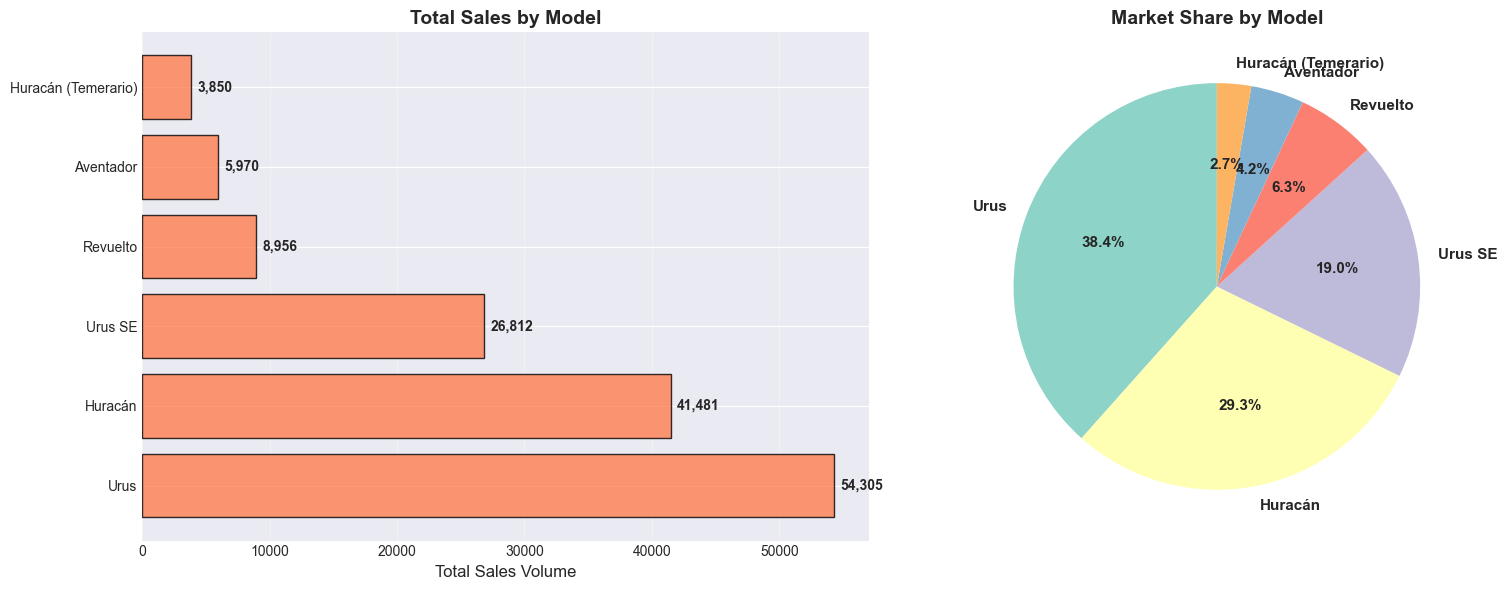

In [17]:
# 2. מכירות לפי דגם
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sales_by_model = df.groupby('Model')['Sales Volume'].sum().sort_values(ascending=False)

# גרף עמודות אופקי
axes[0].barh(sales_by_model.index, sales_by_model.values, color='coral', alpha=0.8, edgecolor='black')
axes[0].set_title('Total Sales by Model', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Total Sales Volume', fontsize=12)
axes[0].grid(axis='x', alpha=0.3)
for i, v in enumerate(sales_by_model.values):
    axes[0].text(v + 500, i, f'{v:,}', va='center', fontweight='bold')

# גרף עוגה
colors = plt.cm.Set3(range(len(sales_by_model)))
axes[1].pie(sales_by_model.values, labels=sales_by_model.index, autopct='%1.1f%%', 
            startangle=90, colors=colors, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title('Market Share by Model', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

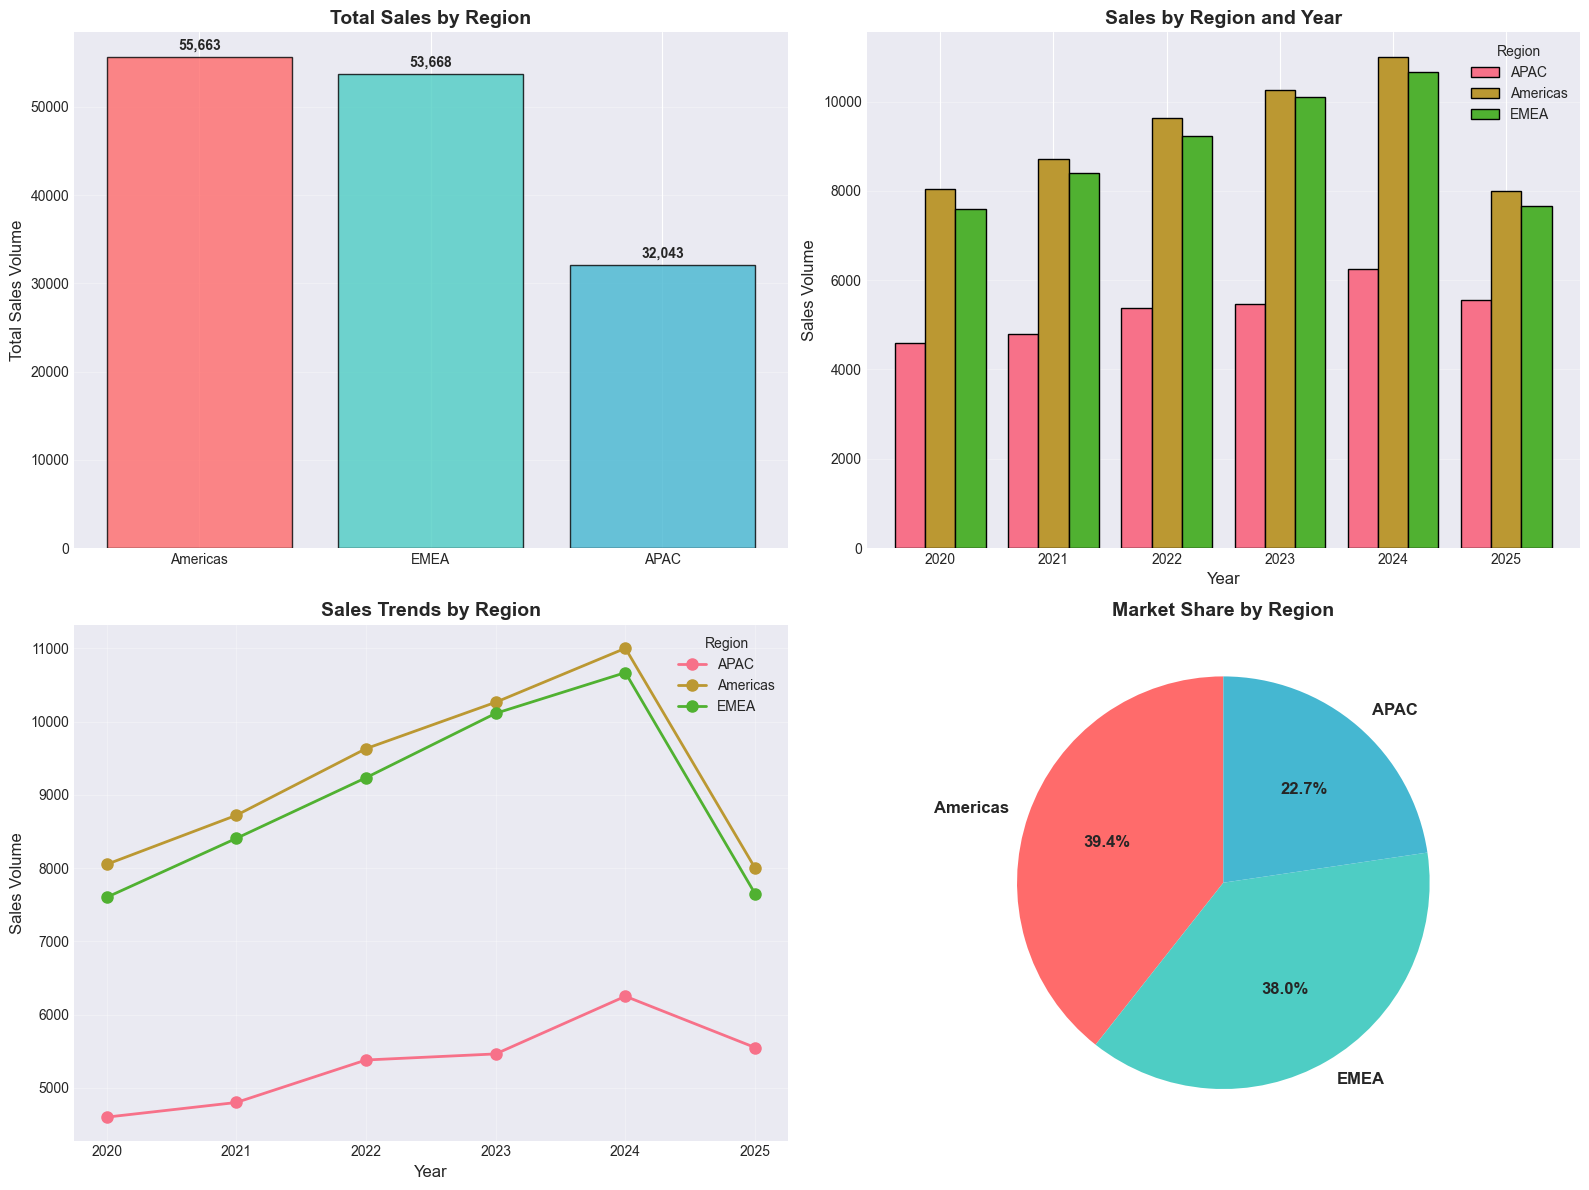

In [18]:
# 3. מכירות לפי אזור
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# סך המכירות לפי אזור
sales_by_region = df.groupby('Region')['Sales Volume'].sum().sort_values(ascending=False)
axes[0, 0].bar(sales_by_region.index, sales_by_region.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'], 
               alpha=0.8, edgecolor='black')
axes[0, 0].set_title('Total Sales by Region', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Total Sales Volume', fontsize=12)
axes[0, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(sales_by_region.values):
    axes[0, 0].text(i, v + 500, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# מכירות לפי אזור ושנה
sales_region_year = df.pivot_table(values='Sales Volume', index='Year', columns='Region', aggfunc='sum')
sales_region_year.plot(kind='bar', ax=axes[0, 1], width=0.8, edgecolor='black')
axes[0, 1].set_title('Sales by Region and Year', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Year', fontsize=12)
axes[0, 1].set_ylabel('Sales Volume', fontsize=12)
axes[0, 1].legend(title='Region', fontsize=10)
axes[0, 1].grid(axis='y', alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=0)

# מגמות לפי אזור
for region in sales_region_year.columns:
    axes[1, 0].plot(sales_region_year.index, sales_region_year[region], marker='o', 
                    linewidth=2, markersize=8, label=region)
axes[1, 0].set_title('Sales Trends by Region', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Year', fontsize=12)
axes[1, 0].set_ylabel('Sales Volume', fontsize=12)
axes[1, 0].legend(title='Region', fontsize=10)
axes[1, 0].grid(True, alpha=0.3)

# חלק שוק לפי אזור
axes[1, 1].pie(sales_by_region.values, labels=sales_by_region.index, autopct='%1.1f%%',
               colors=['#FF6B6B', '#4ECDC4', '#45B7D1'], startangle=90,
               textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1, 1].set_title('Market Share by Region', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

C:\Users\Tamir\AppData\Local\Temp\ipykernel_24984\2271681214.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Model', x='Base Price (USD)', ax=axes[0, 1], order=models_order, palette='Set2')
C:\Users\Tamir\AppData\Local\Temp\ipykernel_24984\2271681214.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Fuel Type', y='Base Price (USD)', ax=axes[1, 1], palette='muted')


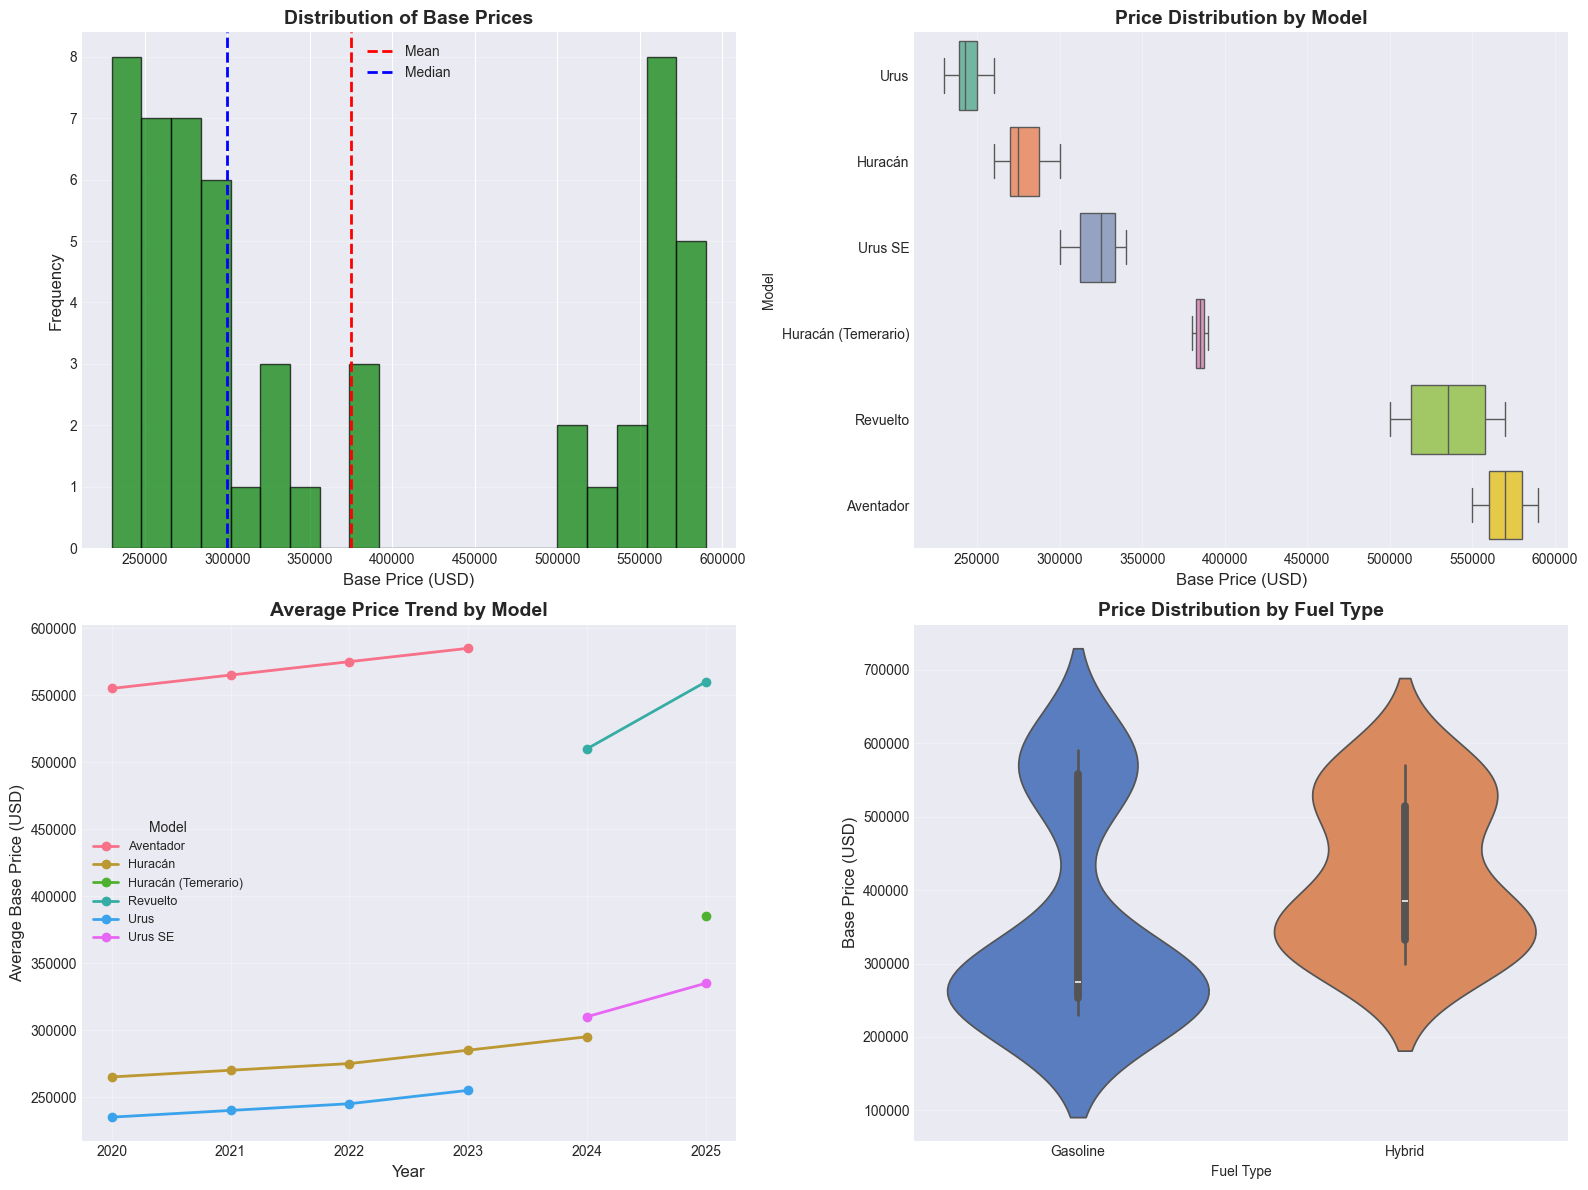


מחיר ממוצע: $374,722
מחיר חציוני: $300,000
מחיר מינימלי: $230,000
מחיר מקסימלי: $590,000


In [19]:
# 4. התפלגות מחירים
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# היסטוגרמה של מחירים
axes[0, 0].hist(df['Base Price (USD)'], bins=20, color='green', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Distribution of Base Prices', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Base Price (USD)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].grid(axis='y', alpha=0.3)
axes[0, 0].axvline(df['Base Price (USD)'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0, 0].axvline(df['Base Price (USD)'].median(), color='blue', linestyle='--', linewidth=2, label='Median')
axes[0, 0].legend()

# Box plot של מחירים לפי דגם
models_order = df.groupby('Model')['Base Price (USD)'].median().sort_values().index
sns.boxplot(data=df, y='Model', x='Base Price (USD)', ax=axes[0, 1], order=models_order, palette='Set2')
axes[0, 1].set_title('Price Distribution by Model', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Base Price (USD)', fontsize=12)
axes[0, 1].grid(axis='x', alpha=0.3)

# מחיר ממוצע לפי שנה ודגם
price_model_year = df.pivot_table(values='Base Price (USD)', index='Year', columns='Model', aggfunc='mean')
price_model_year.plot(kind='line', ax=axes[1, 0], marker='o', linewidth=2, markersize=6)
axes[1, 0].set_title('Average Price Trend by Model', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Year', fontsize=12)
axes[1, 0].set_ylabel('Average Base Price (USD)', fontsize=12)
axes[1, 0].legend(title='Model', fontsize=9)
axes[1, 0].grid(True, alpha=0.3)

# Violin plot - מחיר לפי סוג דלק
sns.violinplot(data=df, x='Fuel Type', y='Base Price (USD)', ax=axes[1, 1], palette='muted')
axes[1, 1].set_title('Price Distribution by Fuel Type', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Base Price (USD)', fontsize=12)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nמחיר ממוצע: ${df['Base Price (USD)'].mean():,.0f}")
print(f"מחיר חציוני: ${df['Base Price (USD)'].median():,.0f}")
print(f"מחיר מינימלי: ${df['Base Price (USD)'].min():,.0f}")
print(f"מחיר מקסימלי: ${df['Base Price (USD)'].max():,.0f}")

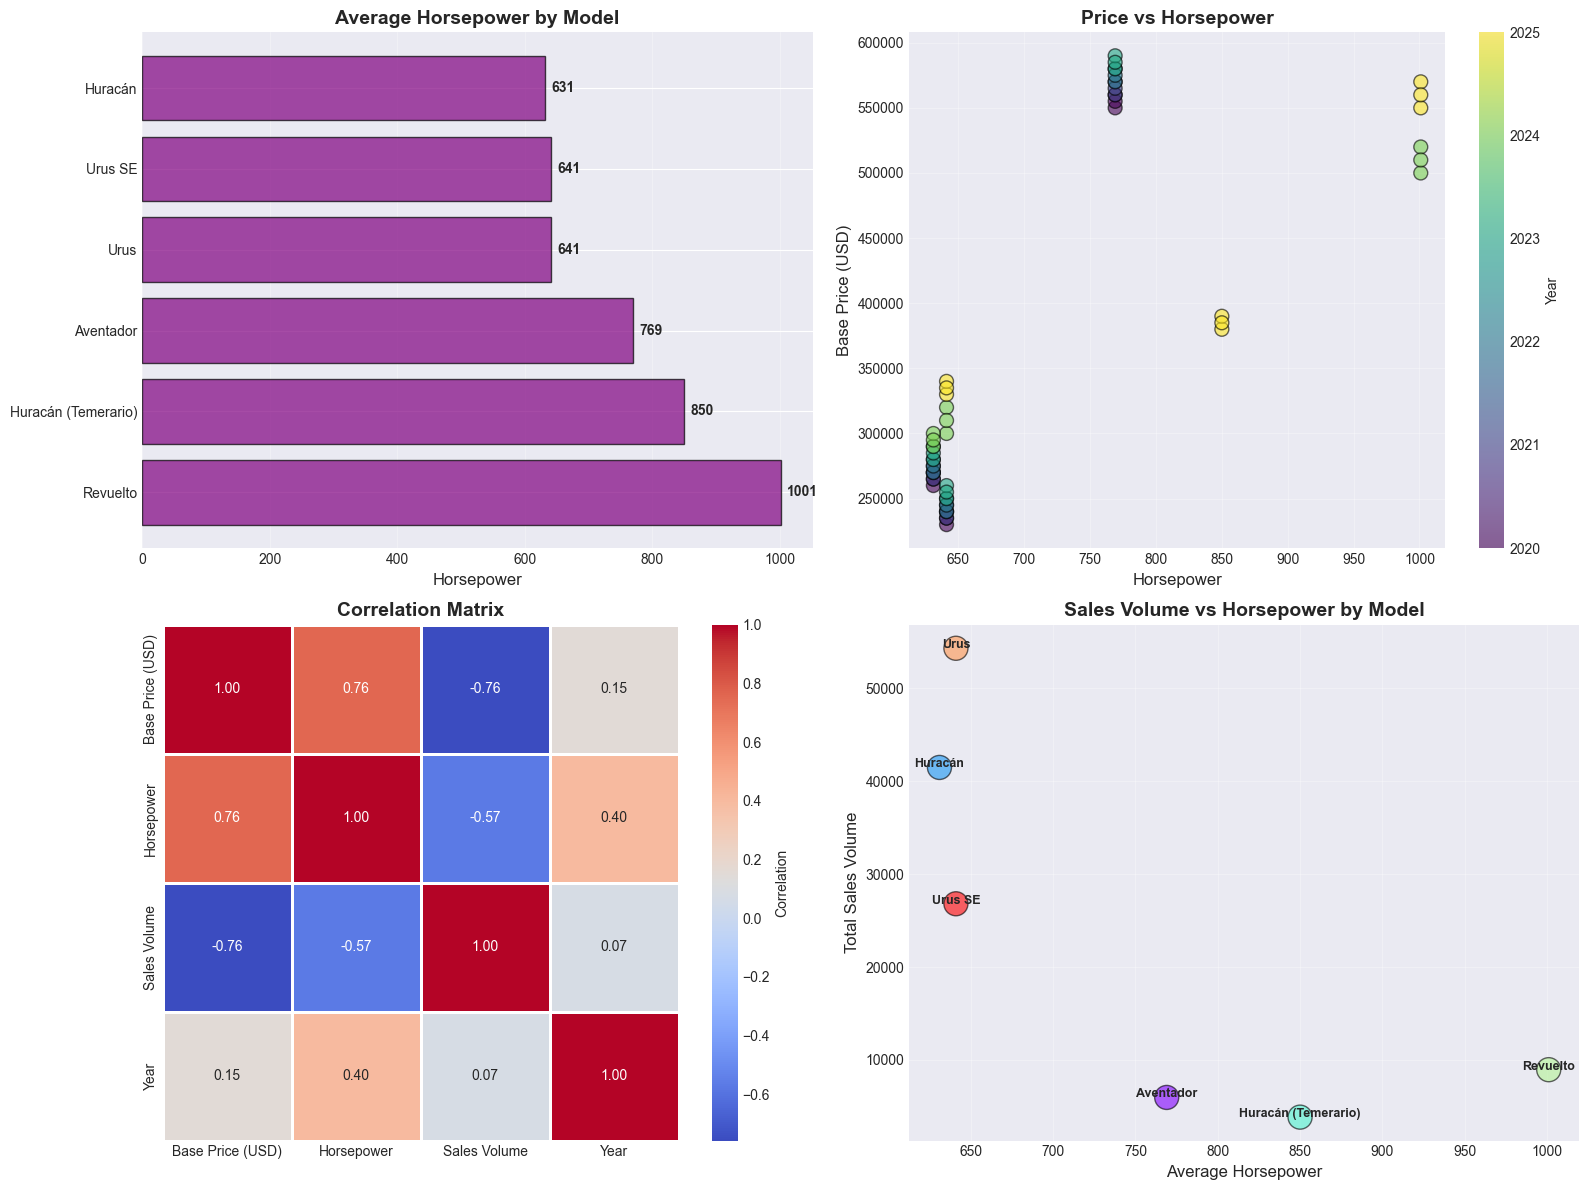

In [20]:
# 5. ניתוח כוח סוס
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# כוח סוס לפי דגם
hp_by_model = df.groupby('Model')['Horsepower'].mean().sort_values(ascending=False)
axes[0, 0].barh(hp_by_model.index, hp_by_model.values, color='purple', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Average Horsepower by Model', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Horsepower', fontsize=12)
axes[0, 0].grid(axis='x', alpha=0.3)
for i, v in enumerate(hp_by_model.values):
    axes[0, 0].text(v + 10, i, f'{v:.0f}', va='center', fontweight='bold')

# קשר בין כוח סוס למחיר
scatter = axes[0, 1].scatter(df['Horsepower'], df['Base Price (USD)'], 
                             c=df['Year'], cmap='viridis', alpha=0.6, s=100, edgecolor='black')
axes[0, 1].set_title('Price vs Horsepower', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Horsepower', fontsize=12)
axes[0, 1].set_ylabel('Base Price (USD)', fontsize=12)
axes[0, 1].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[0, 1], label='Year')

# קורלציה - תרשים חום
numeric_cols = ['Base Price (USD)', 'Horsepower', 'Sales Volume', 'Year']
correlation = df[numeric_cols].corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[1, 0], 
            square=True, linewidths=1, cbar_kws={'label': 'Correlation'})
axes[1, 0].set_title('Correlation Matrix', fontsize=14, fontweight='bold')

# קשר בין כוח סוס למכירות
model_stats = df.groupby('Model').agg({'Horsepower': 'mean', 'Sales Volume': 'sum'})
axes[1, 1].scatter(model_stats['Horsepower'], model_stats['Sales Volume'], 
                   s=300, alpha=0.6, c=range(len(model_stats)), cmap='rainbow', edgecolor='black')
for idx, row in model_stats.iterrows():
    axes[1, 1].annotate(idx, (row['Horsepower'], row['Sales Volume']), 
                        fontsize=9, ha='center', fontweight='bold')
axes[1, 1].set_title('Sales Volume vs Horsepower by Model', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Average Horsepower', fontsize=12)
axes[1, 1].set_ylabel('Total Sales Volume', fontsize=12)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

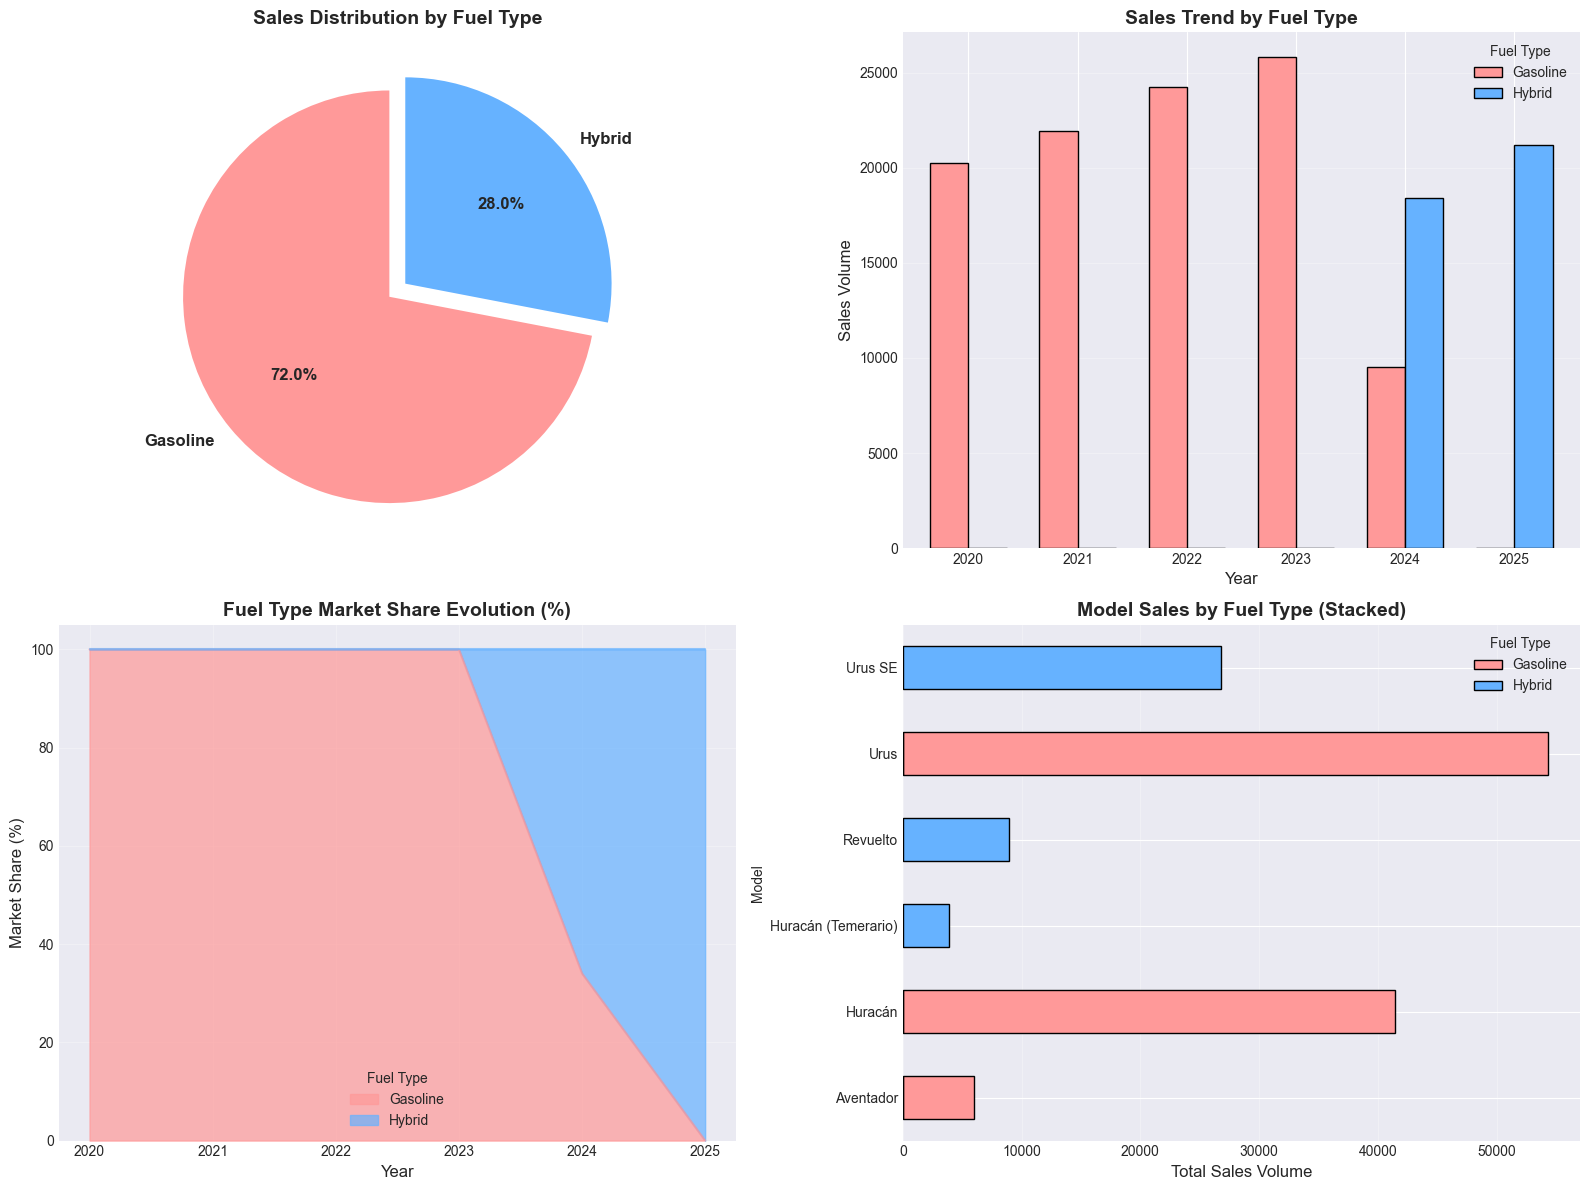

In [21]:
# 6. ניתוח סוג דלק
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# מכירות לפי סוג דלק
sales_by_fuel = df.groupby('Fuel Type')['Sales Volume'].sum()
axes[0, 0].pie(sales_by_fuel.values, labels=sales_by_fuel.index, autopct='%1.1f%%',
               colors=['#FF9999', '#66B2FF'], startangle=90, explode=(0.05, 0.05),
               textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[0, 0].set_title('Sales Distribution by Fuel Type', fontsize=14, fontweight='bold')

# מגמת מכירות לפי סוג דלק
fuel_trend = df.pivot_table(values='Sales Volume', index='Year', columns='Fuel Type', aggfunc='sum')
fuel_trend.plot(kind='bar', ax=axes[0, 1], color=['#FF9999', '#66B2FF'], width=0.7, edgecolor='black')
axes[0, 1].set_title('Sales Trend by Fuel Type', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Year', fontsize=12)
axes[0, 1].set_ylabel('Sales Volume', fontsize=12)
axes[0, 1].legend(title='Fuel Type')
axes[0, 1].tick_params(axis='x', rotation=0)
axes[0, 1].grid(axis='y', alpha=0.3)

# מגמת מעבר להיברידי
fuel_pct = df.groupby(['Year', 'Fuel Type'])['Sales Volume'].sum().unstack(fill_value=0)
fuel_pct_normalized = fuel_pct.div(fuel_pct.sum(axis=1), axis=0) * 100
fuel_pct_normalized.plot(kind='area', ax=axes[1, 0], color=['#FF9999', '#66B2FF'], alpha=0.7)
axes[1, 0].set_title('Fuel Type Market Share Evolution (%)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Year', fontsize=12)
axes[1, 0].set_ylabel('Market Share (%)', fontsize=12)
axes[1, 0].legend(title='Fuel Type')
axes[1, 0].grid(True, alpha=0.3)

# מכירות דגמים לפי סוג דלק
model_fuel = df.pivot_table(values='Sales Volume', index='Model', columns='Fuel Type', aggfunc='sum', fill_value=0)
model_fuel.plot(kind='barh', ax=axes[1, 1], stacked=True, color=['#FF9999', '#66B2FF'], edgecolor='black')
axes[1, 1].set_title('Model Sales by Fuel Type (Stacked)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Total Sales Volume', fontsize=12)
axes[1, 1].legend(title='Fuel Type')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

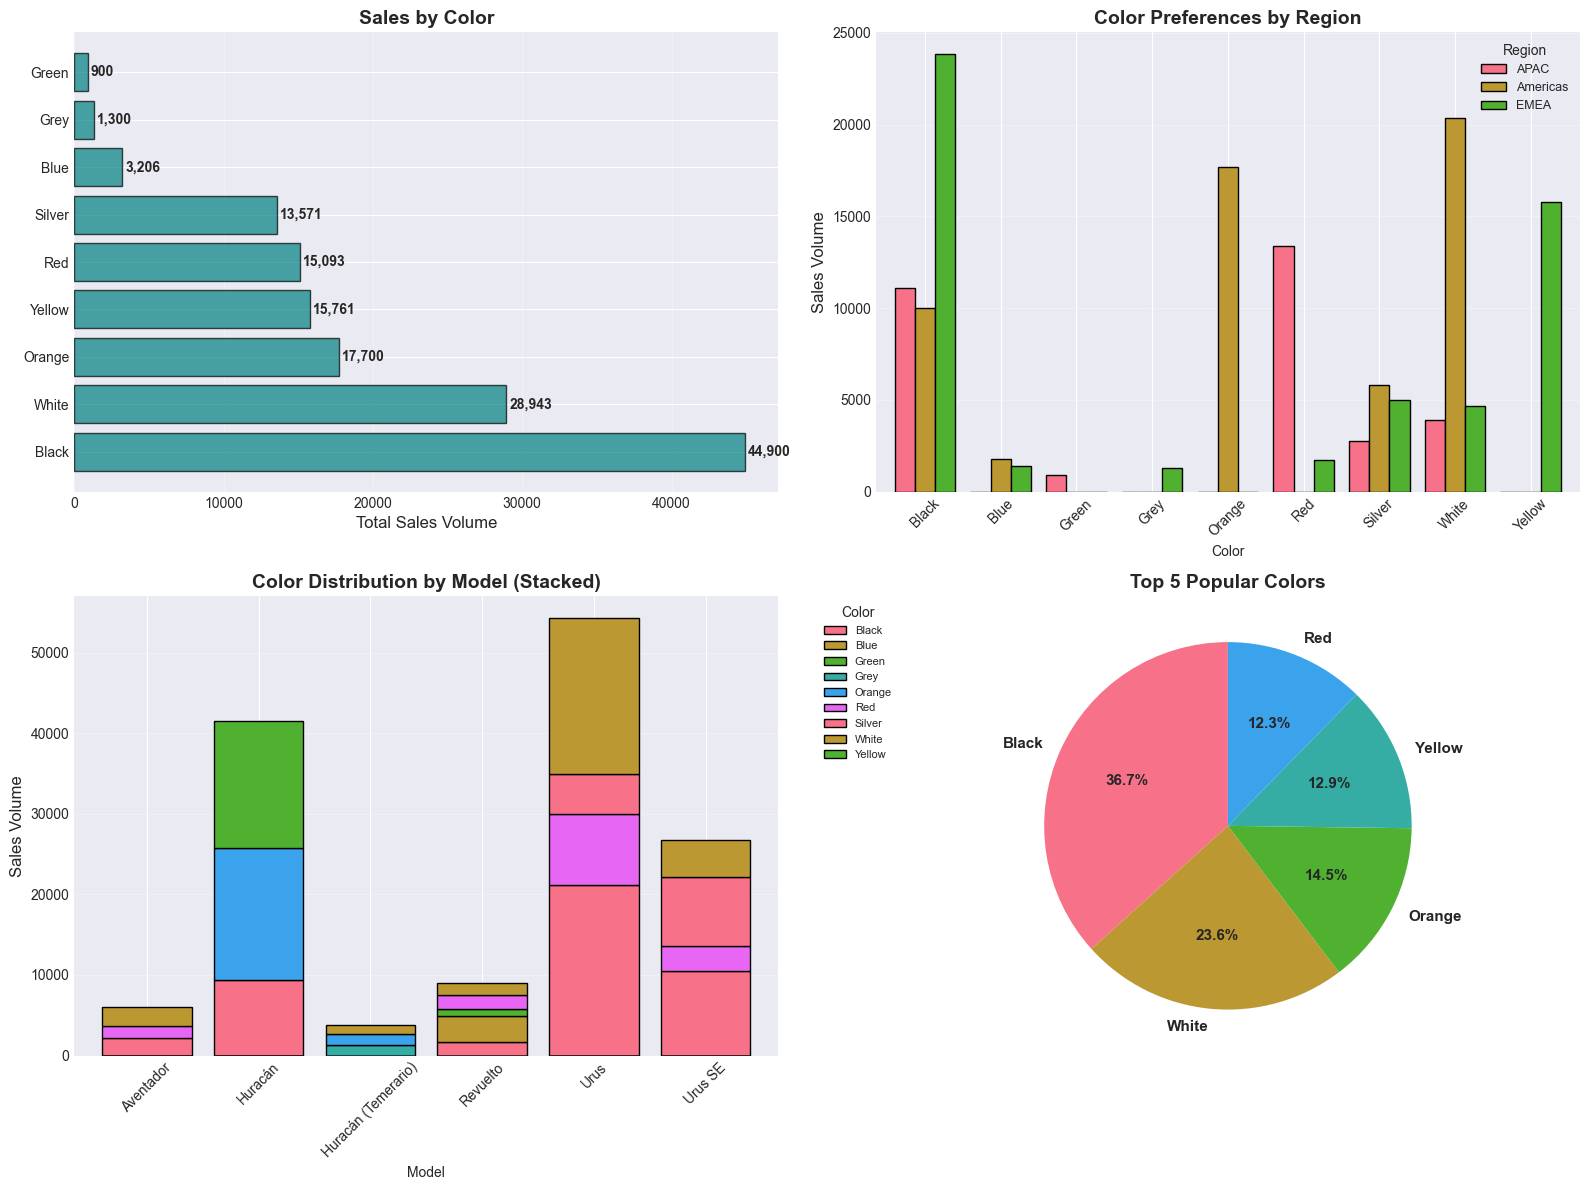

In [22]:
# 7. ניתוח צבעים פופולריים
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# צבעים פופולריים
color_sales = df.groupby('Color')['Sales Volume'].sum().sort_values(ascending=False)
axes[0, 0].barh(color_sales.index, color_sales.values, color='teal', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Sales by Color', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Total Sales Volume', fontsize=12)
axes[0, 0].grid(axis='x', alpha=0.3)
for i, v in enumerate(color_sales.values):
    axes[0, 0].text(v + 200, i, f'{v:,}', va='center', fontweight='bold')

# צבעים לפי אזור
color_region = df.pivot_table(values='Sales Volume', index='Color', columns='Region', aggfunc='sum', fill_value=0)
color_region.plot(kind='bar', ax=axes[0, 1], stacked=False, width=0.8, edgecolor='black')
axes[0, 1].set_title('Color Preferences by Region', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Sales Volume', fontsize=12)
axes[0, 1].legend(title='Region', fontsize=9)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# צבעים לפי דגם
color_model = df.pivot_table(values='Sales Volume', index='Model', columns='Color', aggfunc='sum', fill_value=0)
color_model.plot(kind='bar', ax=axes[1, 0], stacked=True, width=0.8, edgecolor='black')
axes[1, 0].set_title('Color Distribution by Model (Stacked)', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Sales Volume', fontsize=12)
axes[1, 0].legend(title='Color', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# Top 5 צבעים - עוגה
top_colors = color_sales.head(5)
axes[1, 1].pie(top_colors.values, labels=top_colors.index, autopct='%1.1f%%',
               startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1, 1].set_title('Top 5 Popular Colors', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# 8. ניתוח מתקדם - דגמים חדשים לעומת ותיקים
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# מכירות לפי דגם ושנה
model_year_sales = df.pivot_table(values='Sales Volume', index='Year', columns='Model', aggfunc='sum', fill_value=0)
model_year_sales.plot(kind='bar', ax=axes[0, 0], width=0.8, edgecolor='black')
axes[0, 0].set_title('Sales by Model and Year', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Year', fontsize=12)
axes[0, 0].set_ylabel('Sales Volume', fontsize=12)
axes[0, 0].legend(title='Model', fontsize=8, bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0, 0].tick_params(axis='x', rotation=0)
axes[0, 0].grid(axis='y', alpha=0.3)

# מגמות דגמים
for model in model_year_sales.columns:
    axes[0, 1].plot(model_year_sales.index, model_year_sales[model], 
                    marker='o', linewidth=2, markersize=8, label=model)
axes[0, 1].set_title('Model Sales Trends', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Year', fontsize=12)
axes[0, 1].set_ylabel('Sales Volume', fontsize=12)
axes[0, 1].legend(title='Model', fontsize=9)
axes[0, 1].grid(True, alpha=0.3)

# מכירות ממוצעות לפי דגם ואזור
model_region = df.pivot_table(values='Sales Volume', index='Model', columns='Region', aggfunc='mean')
sns.heatmap(model_region, annot=True, fmt='.0f', cmap='YlOrRd', ax=axes[1, 0], 
            linewidths=1, cbar_kws={'label': 'Avg Sales Volume'})
axes[1, 0].set_title('Average Sales: Model vs Region', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Model', fontsize=12)
axes[1, 0].set_xlabel('Region', fontsize=12)

# שינוי באחוזי שוק של הדגמים
model_share = model_year_sales.div(model_year_sales.sum(axis=1), axis=0) * 100
model_share.plot(kind='area', ax=axes[1, 1], alpha=0.7)
axes[1, 1].set_title('Market Share Evolution by Model (%)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Year', fontsize=12)
axes[1, 1].set_ylabel('Market Share (%)', fontsize=12)
axes[1, 1].legend(title='Model', fontsize=8, bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## סיכום תובנות עיקריות

In [ ]:
print("="*80)
print("                    תובנות עיקריות מניתוח הנתונים")
print("="*80)

# 1. סך המכירות
total_sales = df['Sales Volume'].sum()
print(f"\n📊 1. סך כל המכירות 2020-2025: {total_sales:,} יחידות")

# 2. דגם הכי נמכר
best_model = df.groupby('Model')['Sales Volume'].sum().idxmax()
best_model_sales = df.groupby('Model')['Sales Volume'].sum().max()
print(f"\n🏆 2. דגם הכי נמכר: {best_model} ({best_model_sales:,} יחידות)")

# 3. אזור מוביל
best_region = df.groupby('Region')['Sales Volume'].sum().idxmax()
best_region_sales = df.groupby('Region')['Sales Volume'].sum().max()
print(f"\n🌍 3. אזור מוביל: {best_region} ({best_region_sales:,} יחידות)")

# 4. שנה הכי טובה
best_year = df.groupby('Year')['Sales Volume'].sum().idxmax()
best_year_sales = df.groupby('Year')['Sales Volume'].sum().max()
print(f"\n📅 4. שנה עם הכי הרבה מכירות: {best_year} ({best_year_sales:,} יחידות)")

# 5. צבע פופולרי
best_color = df.groupby('Color')['Sales Volume'].sum().idxmax()
best_color_sales = df.groupby('Color')['Sales Volume'].sum().max()
print(f"\n🎨 5. צבע הכי פופולרי: {best_color} ({best_color_sales:,} יחידות)")

# 6. מעבר להיברידי
hybrid_2024 = df[df['Year'] >= 2024]['Fuel Type'].value_counts()
if 'Hybrid' in hybrid_2024.index:
    hybrid_pct = (hybrid_2024['Hybrid'] / hybrid_2024.sum() * 100)
    print(f"\n⚡ 6. אחוז דגמי היברידי ב-2024-2025: {hybrid_pct:.1f}%")

# 7. טווח מחירים
price_range = df['Base Price (USD)'].max() - df['Base Price (USD)'].min()
print(f"\n💰 7. טווח מחירים: ${df['Base Price (USD)'].min():,} - ${df['Base Price (USD)'].max():,}")
print(f"    (פער של ${price_range:,})")

# 8. כוח סוס ממוצע
avg_hp = df['Horsepower'].mean()
max_hp = df['Horsepower'].max()
print(f"\n🏎️  8. כוח סוס ממוצע: {avg_hp:.0f} HP")
print(f"    כוח סוס מקסימלי: {max_hp:.0f} HP ({df[df['Horsepower'] == max_hp]['Model'].iloc[0]})")

# 9. צמיחה
sales_2020 = df[df['Year'] == 2020]['Sales Volume'].sum()
sales_2025 = df[df['Year'] == 2025]['Sales Volume'].sum()
growth = ((sales_2025 / sales_2020) - 1) * 100
print(f"\n📈 9. צמיחה 2020-2025: {growth:+.1f}%")
print(f"    (מ-{sales_2020:,} ל-{sales_2025:,} יחידות)")

# 10. דגמים חדשים
new_models = df[df['Year'] >= 2024]['Model'].unique()
old_models = df[df['Year'] < 2024]['Model'].unique()
truly_new = [m for m in new_models if m not in old_models]
if truly_new:
    print(f"\n🆕 10. דגמים חדשים (2024-2025): {', '.join(truly_new)}")

print("\n" + "="*80)

In [ ]:
# טבלת סיכום לפי דגם
print("\n📋 סיכום מפורט לפי דגם:\n")
summary = df.groupby('Model').agg({
    'Sales Volume': 'sum',
    'Base Price (USD)': 'mean',
    'Horsepower': 'mean',
    'Year': ['min', 'max']
}).round(0)

summary.columns = ['Total Sales', 'Avg Price (USD)', 'Avg HP', 'First Year', 'Last Year']
summary = summary.sort_values('Total Sales', ascending=False)
summary

In [ ]:
# שמירת הממצאים לקובץ
summary.to_csv('lamborghini_summary_by_model.csv')
print("\n✓ הסיכום נשמר לקובץ: lamborghini_summary_by_model.csv")

In [ ]:
# סיכום סופי של הנתונים המעובדים
print("="*80)
print("                     📋 סיכום נתונים מעובדים")
print("="*80)

print("\n🔹 גודל סטים:")
print(f"   Train: {X_train_scaled.shape[0]} דוגמאות, {X_train_scaled.shape[1]} משתנים")
print(f"   Test:  {X_test_scaled.shape[0]} דוגמאות, {X_test_scaled.shape[1]} משתנים")

print("\n🔹 משתנים במודל:")
print(f"   סה\"כ Features: {X_train_scaled.shape[1]}")

print("\n🔹 משתנה Target (y):")
print(f"   שם: Base Price (USD)")
print(f"   טווח: ${y.min():,.0f} - ${y.max():,.0f}")
print(f"   ממוצע: ${y.mean():,.0f}")

print("\n🔹 נתונים מנורמלים:")
print(f"   ממוצע כללי: {X_train_scaled.mean().mean():.6f}")
print(f"   סטיית תקן כללית: {X_train_scaled.std().mean():.6f}")

print("\n" + "="*80)
print("✅ כל שלבי עיבוד הנתונים הושלמו בהצלחה!")
print("✅ הנתונים מוכנים לבניית מודל רגרסיה לינארית")
print("="*80)

# שמירת הנתונים המעובדים (אופציונלי)
print("\n💾 שמירת הנתונים המעובדים לקבצים...")
X_train_scaled.to_csv('X_train_scaled.csv', index=False)
X_test_scaled.to_csv('X_test_scaled.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
print("✓ נתונים נשמרו בהצלחה!")

In [ ]:
# סיכום מלא של המודל
print("="*80)
print("              🎯 סיכום מלא - מודל חיזוי מחירי למבורגיני")
print("="*80)

print("\n📊 נתונים:")
print("-" * 60)
print(f"   סה\"כ דוגמאות: {len(df)}")
print(f"   נתוני אימון: {len(X_train)} ({(len(X_train)/len(df)*100):.0f}%)")
print(f"   נתוני בדיקה: {len(X_test)} ({(len(X_test)/len(df)*100):.0f}%)")
print(f"   מספר משתנים: {X_train_scaled.shape[1]}")

print("\n🎯 ביצועי המודל:")
print("-" * 60)
print(f"   Train R²: {r2_train:.4f}")
print(f"   Test R²:  {r2_test:.4f}")
print(f"   Test RMSE: ${rmse_test:,.2f}")
print(f"   Test MAE:  ${mae_test:,.2f}")

print("\n🔝 Top 5 משתנים משפיעים ביותר:")
print("-" * 60)
for idx, row in feature_importance.head(5).iterrows():
    abs_coef = abs(row['Coefficient'])
    pct = (abs_coef / abs(feature_importance['Coefficient']).sum()) * 100
    print(f"   {row['Feature']}: {row['Coefficient']:,.2f} ({pct:.1f}%)")

print("\n💡 מסקנות:")
print("-" * 60)
avg_price = y.mean()
mae_pct = (mae_test / avg_price) * 100
print(f"   • הדיוק הממוצע של המודל: {100-mae_pct:.1f}%")
print(f"   • שגיאה ממוצעת: ±${mae_test:,.0f} ({mae_pct:.1f}% מהמחיר הממוצע)")
print(f"   • המודל מסביר {r2_test*100:.1f}% מהשונות במחירים")

if r2_test >= 0.85:
    print(f"   • ✅ המודל מצוין לחיזוי מחירי רכב!")
elif r2_test >= 0.7:
    print(f"   • ✅ המודל טוב וראוי לשימוש!")
else:
    print(f"   • ⚠️ המודל יכול להשתפר עם נתונים נוספים")

print("\n" + "="*80)
print("✨ המודל הושלם בהצלחה! ✨")
print("="*80)

## 🎉 סיכום המודל

המודל שלנו מוכן! להלן סיכום מלא של התהליך והתוצאות.

In [ ]:
# ויזואליזציות של ביצועי המודל
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Actual vs Predicted - Train
axes[0, 0].scatter(y_train, y_train_pred, alpha=0.6, edgecolor='black', s=80)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
                'r--', linewidth=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Price (USD)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Predicted Price (USD)', fontsize=12, fontweight='bold')
axes[0, 0].set_title(f'Train Set: Actual vs Predicted\nR² = {r2_train:.4f}', 
                     fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Actual vs Predicted - Test
axes[0, 1].scatter(y_test, y_test_pred, alpha=0.6, color='orange', edgecolor='black', s=80)
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                'r--', linewidth=2, label='Perfect Prediction')
axes[0, 1].set_xlabel('Actual Price (USD)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Predicted Price (USD)', fontsize=12, fontweight='bold')
axes[0, 1].set_title(f'Test Set: Actual vs Predicted\nR² = {r2_test:.4f}', 
                     fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Residuals (שגיאות) - Train
residuals_train = y_train - y_train_pred
axes[1, 0].scatter(y_train_pred, residuals_train, alpha=0.6, edgecolor='black', s=80)
axes[1, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Predicted Price (USD)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Residuals (Actual - Predicted)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Train Set: Residual Plot', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Residuals (שגיאות) - Test
residuals_test = y_test - y_test_pred
axes[1, 1].scatter(y_test_pred, residuals_test, alpha=0.6, color='orange', edgecolor='black', s=80)
axes[1, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Predicted Price (USD)', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Residuals (Actual - Predicted)', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Test Set: Residual Plot', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 הסבר התרשימים:")
print("="*80)
print("1️⃣  Actual vs Predicted: נקודות קרובות לקו האדום = חיזוי טוב")
print("2️⃣  Residual Plot: נקודות קרובות לציר 0 = שגיאות קטנות")

## שלב 2.4: ויזואליזציות ותרשימים

הצגה ויזואלית של ביצועי המודל עוזרת להבין עד כמה טוב המודל מחזה.

In [ ]:
# הערכת ביצועי המודל
print("="*80)
print("📊 הערכת ביצועי המודל (Model Evaluation)")
print("="*80)

# חישוב מדדי ביצוע עבור Train
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)

# חישוב מדדי ביצוע עבור Test
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)

# הצגת תוצאות Train
print("\n🎯 ביצועים על נתוני TRAIN (80%):")
print("-" * 60)
print(f"   R² Score:   {r2_train:.4f}  ({r2_train*100:.2f}% מהשונות מוסברת)")
print(f"   RMSE:       ${rmse_train:,.2f}")
print(f"   MAE:        ${mae_train:,.2f}")

# הצגת תוצאות Test
print("\n🎯 ביצועים על נתוני TEST (20%):")
print("-" * 60)
print(f"   R² Score:   {r2_test:.4f}  ({r2_test*100:.2f}% מהשונות מוסברת)")
print(f"   RMSE:       ${rmse_test:,.2f}")
print(f"   MAE:        ${mae_test:,.2f}")

# פירוש התוצאות
print("\n" + "="*80)
print("💡 פירוש התוצאות:")
print("="*80)

if r2_test >= 0.9:
    quality = "🌟 מצוין! המודל מדויק מאוד"
elif r2_test >= 0.8:
    quality = "✅ טוב מאוד! המודל עובד היטב"
elif r2_test >= 0.6:
    quality = "👍 סביר. המודל סביר אך יש מקום לשיפור"
else:
    quality = "⚠️ חלש. המודל זקוק לשיפור"

print(f"\nR² על Test: {quality}")
print(f"שגיאה ממוצעת (MAE): ${mae_test:,.0f}")
print(f"משמעות: בממוצע, החיזויים טועים ב-±${mae_test:,.0f}")

# בדיקת Overfitting/Underfitting
diff_r2 = r2_train - r2_test
if diff_r2 > 0.1:
    print(f"\n⚠️ הערה: יש הפרש של {diff_r2:.2%} בין Train ל-Test")
    print("   זה עשוי להצביע על Overfitting קל (המודל 'שינן' את נתוני האימון)")
elif diff_r2 < -0.1:
    print(f"\n⚠️ הערה: Test טוב יותר מ-Train ב-{abs(diff_r2):.2%}")
    print("   זה יכול להיות מזל או שגודל הTest קטן מדי")
else:
    print(f"\n✅ ההפרש בין Train ל-Test הוא {diff_r2:.2%} - זה מצוין!")
    print("   המודל מכליל היטב לנתונים חדשים")

## שלב 2.3: הערכת ביצועי המודל (Model Evaluation)

**מדדי הערכה:**
- **R² (R-Squared)**: עד כמה המודל מסביר את השונות במחירים (0-1, גבוה יותר = טוב יותר)
- **RMSE (Root Mean Squared Error)**: שגיאה ממוצעת (באותן יחידות כמו y, נמוך יותר = טוב יותר)
- **MAE (Mean Absolute Error)**: שגיאה ממוצעת מוחלטת (נמוך יותר = טוב יותר)

**פירוש R²:**
- R² = 1.0 → המודל מושלם (חיזוי מדויק 100%)
- R² = 0.8-0.9 → מודל מצוין
- R² = 0.6-0.8 → מודל טוב
- R² < 0.6 → מודל חלש

In [ ]:
# חיזוי על נתוני Train ו-Test
print("="*80)
print("🔮 חיזוי מחירים (Prediction)")
print("="*80)

# חיזוי על נתוני האימון
y_train_pred = model.predict(X_train_scaled)
print(f"\n✅ חיזוי על נתוני Train הושלם: {len(y_train_pred)} חיזויים")

# חיזוי על נתוני הבדיקה
y_test_pred = model.predict(X_test_scaled)
print(f"✅ חיזוי על נתוני Test הושלם: {len(y_test_pred)} חיזויים")

# הצגת דוגמאות לחיזויים
print(f"\n📋 דוגמאות לחיזויים על נתוני Test:")
print("-" * 80)
comparison = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_test_pred,
    'Difference': y_test.values - y_test_pred,
    'Error %': np.abs((y_test.values - y_test_pred) / y_test.values * 100)
})
comparison['Actual Price'] = comparison['Actual Price'].apply(lambda x: f"${x:,.0f}")
comparison['Predicted Price'] = comparison['Predicted Price'].apply(lambda x: f"${x:,.0f}")
comparison['Difference'] = comparison['Difference'].apply(lambda x: f"${x:,.0f}")
comparison['Error %'] = comparison['Error %'].apply(lambda x: f"{x:.1f}%")

print(comparison.head(10).to_string(index=False))

## שלב 2.2: חיזוי על נתוני Test (20%)

לאחר שהמודל למד מנתוני האימון, כעת נבדוק את ביצועיו על נתונים שהוא **מעולם לא ראה**!  
זו הדרך לבדוק אם המודל באמת "הבין" את הקשר בין המשתנים למחיר, או שהוא רק "שינן" את נתוני האימון.

In [ ]:
# בניית מודל רגרסיה לינארית
print("="*80)
print("🚀 בניית מודל רגרסיה לינארית (Linear Regression)")
print("="*80)

# יצירת אובייקט המודל
model = LinearRegression()

# אימון המודל על נתוני האימון (80%)
print("\n⏳ מאמן את המודל על נתוני האימון...")
model.fit(X_train_scaled, y_train)
print("✅ אימון הושלם בהצלחה!")

# הצגת פרמטרים של המודל
print(f"\n📊 פרמטרים של המודל:")
print(f"   - Intercept (β₀): ${model.intercept_:,.2f}")
print(f"   - מספר Coefficients: {len(model.coef_)}")

# הצגת 5 ה-Coefficients הכי חשובים (הכי גבוהים/נמוכים)
feature_importance = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print(f"\n🔝 Top 10 משתנים משפיעים ביותר על המחיר:")
print("-" * 60)
for idx, row in feature_importance.head(10).iterrows():
    direction = "📈" if row['Coefficient'] > 0 else "📉"
    print(f"{direction} {row['Feature']}: {row['Coefficient']:,.2f}")

print(f"\n✅ המודל מוכן לחיזוי!")

## שלב 2.1: בניית המודל ואימון

**רגרסיה לינארית מרובת משתנים:**  
המודל מנסה למצוא את הקשר הלינארי הטוב ביותר בין המשתנים הבלתי תלויים (X) למחיר (y).

**הנוסחה:** `y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ`

כאשר:
- y = המחיר (התוצאה שאנחנו מחזים)
- x₁, x₂, ..., xₙ = המשתנים הבלתי תלויים
- β₀ = הקבוע (intercept)
- β₁, β₂, ..., βₙ = המקדמים (coefficients) שהמודל לומד

# 🚀 שלב 2: בניית מודל רגרסיה לינארית והערכת ביצועים

---

## מטרה: בניית מודל לחיזוי מחירי רכב

בשלב זה נבנה את המודל ונעריך את ביצועיו:
1. **בניית מודל רגרסיה לינארית מרובת משתנים**
2. **אימון על 80% מנתוני האימון**
3. **חיזוי על 20% נתוני הבדיקה**
4. **הערכת ביצועי המודל** (R², RMSE, MAE)
5. **ויזואליזציות והשוואות**
6. **ניתוח משתנים חשובים**

## 🎉 סיכום שלב 1: הנתונים מוכנים למודל!

עברנו את כל השלבים המוקדמים:
- ✅ **בדיקת ערכים חסרים** - לא נמצאו או טופלו
- ✅ **קידוד משתנים קטגוריאליים** - הומרו לערכים מספריים
- ✅ **בחירת משתנים רלוונטיים** - הוסרו עמודות מיותרות
- ✅ **זיהוי Outliers** - בדקנו והחלטנו לשמור אותם
- ✅ **הפרדת X ו-y** - משתנים בלתי תלויים ותלויים
- ✅ **פיצול Train-Test** - 80% אימון, 20% בדיקה
- ✅ **נורמליזציה** - כל המשתנים בסקאלה אחידה

**הנתונים מוכנים כעת לבניית מודל רגרסיה לינארית! 🚀**

In [ ]:
# נורמליזציה באמצעות StandardScaler
print("="*80)
print("נורמליזציה (Feature Scaling) - StandardScaler")
print("="*80)

# יצירת אובייקט Scaler
scaler = StandardScaler()

# Fit על נתוני האימון בלבד (לומדים את הממוצע והסטיית התקן)
scaler.fit(X_train)

# Transform על Train ו-Test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# המרה חזרה ל-DataFrame (לשמירת שמות העמודות)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("\n✓ נורמליזציה הושלמה!")

print(f"\nלפני נורמליזציה (דוגמה מהנתונים המקוריים):")
print(X_train.head(3))

print(f"\nאחרי נורמליזציה (אותן שורות):")
print(X_train_scaled.head(3))

print(f"\nסטטיסטיקות אחרי נורמליזציה:")
print(f"  ממוצע: {X_train_scaled.mean().mean():.6f} (צריך להיות קרוב ל-0)")
print(f"  סטיית תקן: {X_train_scaled.std().mean():.6f} (צריך להיות קרוב ל-1)")

# השוואת טווחים לפני ואחרי
print(f"\n📊 השוואת טווחים:")
print("-" * 60)
sample_features = ['Year', 'Horsepower'] if 'Year' in X_train.columns and 'Horsepower' in X_train.columns else X_train.columns[:2]
for col in sample_features:
    if col in X_train.columns:
        orig_range = X_train[col].max() - X_train[col].min()
        scaled_range = X_train_scaled[col].max() - X_train_scaled[col].min()
        print(f"{col}:")
        print(f"  לפני:  טווח = {orig_range:,.2f}")
        print(f"  אחרי: טווח = {scaled_range:.2f}")

## שלב 1.8: נורמליזציה וסקלור (Feature Scaling)

**למה צריך Scaling?**  
משתנים שונים יכולים להיות בסקאלות שונות:
- שנה: 2020-2025 (טווח קטן)
- כוח סוס: 600-1000 (טווח בינוני)
- מחיר: 230,000-590,000 (טווח גדול מאוד!)

**StandardScaler:** הופך כל משתנה לממוצע 0 וסטיית תקן 1  
**נוסחה:** `z = (x - μ) / σ`

**חשוב:** מבצעים Fit רק על Train, ואז Transform על Train וגם Test!

In [ ]:
# פיצול לנתוני אימון ובדיקה
print("="*80)
print("פיצול נתונים: Train-Test Split")
print("="*80)

# פיצול: 80% אימון, 20% בדיקה
# random_state=42 מבטיח שנקבל אותו פיצול בכל פעם (לשחזור)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,  # 20% לבדיקה
    random_state=42  # למען שחזוריות
)

print(f"\n✓ פיצול הושלם!")
print(f"\nנתוני אימון (Train Set):")
print(f"  - X_train: {X_train.shape} (דוגמאות, משתנים)")
print(f"  - y_train: {y_train.shape}")
print(f"  - אחוז מהנתונים: {(len(X_train)/len(X))*100:.1f}%")

print(f"\nנתוני בדיקה (Test Set):")
print(f"  - X_test: {X_test.shape} (דוגמאות, משתנים)")
print(f"  - y_test: {y_test.shape}")
print(f"  - אחוז מהנתונים: {(len(X_test)/len(X))*100:.1f}%")

print(f"\nסטטיסטיקות של y (מחיר):")
print(f"  Train - ממוצע: ${y_train.mean():,.0f}, טווח: ${y_train.min():,.0f} - ${y_train.max():,.0f}")
print(f"  Test  - ממוצע: ${y_test.mean():,.0f}, טווח: ${y_test.min():,.0f} - ${y_test.max():,.0f}")

## שלב 1.7: פיצול לנתוני אימון ובדיקה (Train-Test Split)

**למה לפצל את הנתונים?**  
- **Train Set (אימון)**: נתונים ללמד את המודל (בדרך כלל 70-80%)
- **Test Set (בדיקה)**: נתונים לבדוק את ביצועי המודל (20-30%)

**חשוב:** המודל לא רואה את נתוני הבדיקה בזמן האימון!  
זה מבטיח שנוכל לבדוק באמת כמה טוב המודל על נתונים חדשים.

# שלב 1: עיבוד נתונים והכנה למודל רגרסיה

---

## מטרה: בניית מודל רגרסיה לינארית לחיזוי מחירי רכב

בשלב זה נבצע:
1. **בדיקת ערכים חסרים** והחלפתם בממוצעים
2. **קידוד משתנים קטגוריאליים** (Encoding)
3. **זיהוי והסרת ערכים קיצוניים** (Outliers)
4. **נורמליזציה וסקלור** של נתונים
5. **פיצול לנתוני אימון ובדיקה**
6. **הכנה למודל Machine Learning**

In [ ]:
# הפרדת X (Features) ו-y (Target)
print("="*80)
print("הפרדת משתנים: X (Features) ו-y (Target)")
print("="*80)

# בדיקה שעמודת המחיר קיימת
if 'Base Price (USD)' not in df_ml_cleaned.columns:
    print("⚠ שגיאה: עמודת המחיר לא נמצאה!")
else:
    # y = המשתנה התלוי (מה שאנחנו רוצים לחזות)
    y = df_ml_cleaned['Base Price (USD)']
    
    # X = כל המשתנים הבלתי תלויים (בלי המחיר)
    X = df_ml_cleaned.drop('Base Price (USD)', axis=1)
    
    print(f"\n✓ משתנה תלוי (y - Target):")
    print(f"  - שם: Base Price (USD)")
    print(f"  - צורה: {y.shape}")
    print(f"  - טווח: ${y.min():,.0f} - ${y.max():,.0f}")
    print(f"  - ממוצע: ${y.mean():,.0f}")
    
    print(f"\n✓ משתנים בלתי תלויים (X - Features):")
    print(f"  - מספר משתנים: {X.shape[1]}")
    print(f"  - מספר דוגמאות: {X.shape[0]}")
    print(f"  - צורה: {X.shape}")
    
    print(f"\n  רשימת משתנים (Features):")
    for i, col in enumerate(X.columns, 1):
        print(f"    {i:2}. {col}")
    
    print("\n✓ הפרדת המשתנים הושלמה!")

## שלב 1.6: הפרדת משתנים והגדרת X, y

**הפרדת הנתונים:**
- **X (Features)**: כל המשתנים הבלתי תלויים שמהם נחזה (כוח סוס, שנה, צבע וכו')
- **y (Target)**: המשתנה התלוי שאנחנו רוצים לחזות (Base Price)

זהו שלב קריטי לפני בניית המודל!

In [ ]:
# זיהוי והסרת Outliers - שיטת IQR
print("="*80)
print("זיהוי והסרת ערכים קיצוניים (Outliers Detection)")
print("="*80)

# נבדוק outliers רק בעמודות מספריות
numeric_cols_for_outliers = ['Base Price (USD)', 'Horsepower', 'Year']

# שמירת הנתונים לפני הסרת outliers
df_before_outliers = df_ml_cleaned.copy()
initial_rows = len(df_ml_cleaned)

outliers_found = {}

# חישוב ויזואליזציה של outliers
fig, axes = plt.subplots(1, len(numeric_cols_for_outliers), figsize=(16, 5))

for idx, col in enumerate(numeric_cols_for_outliers):
    if col in df_ml_cleaned.columns:
        # חישוב IQR
        Q1 = df_ml_cleaned[col].quantile(0.25)
        Q3 = df_ml_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # חישוב גבולות
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # זיהוי outliers
        outliers = df_ml_cleaned[(df_ml_cleaned[col] < lower_bound) | (df_ml_cleaned[col] > upper_bound)]
        outliers_found[col] = len(outliers)
        
        # ויזואליזציה - Box Plot
        axes[idx].boxplot(df_ml_cleaned[col], vert=True)
        axes[idx].set_title(f'{col}\n({outliers_found[col]} outliers)', fontweight='bold')
        axes[idx].set_ylabel('Value')
        axes[idx].grid(axis='y', alpha=0.3)
        axes[idx].axhline(y=lower_bound, color='r', linestyle='--', linewidth=1, label='Lower Bound')
        axes[idx].axhline(y=upper_bound, color='r', linestyle='--', linewidth=1, label='Upper Bound')
        
        print(f"\n{col}:")
        print(f"  Q1 (25%): {Q1:,.2f}")
        print(f"  Q3 (75%): {Q3:,.2f}")
        print(f"  IQR: {IQR:,.2f}")
        print(f"  Lower Bound: {lower_bound:,.2f}")
        print(f"  Upper Bound: {upper_bound:,.2f}")
        print(f"  Outliers נמצאו: {outliers_found[col]}")

plt.tight_layout()
plt.show()

# החלטה: האם להסיר outliers
print("\n" + "="*80)
print("החלטה לגבי הסרת Outliers")
print("="*80)

# בדוגמה זו, נבחר לא להסיר outliers כי:
# 1. הנתונים שלנו קטנים (55 שורות)
# 2. המחירים הגבוהים הם לגיטימיים (דגמים יוקרתיים)
# 3. השונות במחירים היא חלק מהנתונים

print(f"\n✓ בנתונים שלנו, הOutliers הם לגיטימיים (דגמי יוקרה)")
print(f"✓ לכן, לא נסיר אותם מהנתונים")
print(f"✓ מספר שורות נשאר: {len(df_ml_cleaned)}")

# אם רוצים להסיר outliers, אפשר להשתמש בקוד הזה:
# for col in numeric_cols_for_outliers:
#     if col in df_ml_cleaned.columns:
#         Q1 = df_ml_cleaned[col].quantile(0.25)
#         Q3 = df_ml_cleaned[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         df_ml_cleaned = df_ml_cleaned[(df_ml_cleaned[col] >= lower_bound) & (df_ml_cleaned[col] <= upper_bound)]

print(f"\nסה\"כ outliers שזוהו: {sum(outliers_found.values())}")
print(f"שורות שנותרו: {len(df_ml_cleaned)}/{initial_rows}")

## שלב 1.5: זיהוי והסרת ערכים קיצוניים (Outliers)

**מה זה Outliers?**  
ערכים חריגים או קיצוניים שיכולים לשבש את המודל. למשל, מחיר שגבוה בצורה לא סבירה.

**שיטת IQR (Interquartile Range):**
- מחשבים את הרבעון הראשון (Q1 = 25%) והשלישי (Q3 = 75%)
- IQR = Q3 - Q1
- ערכים מחוץ לטווח [Q1 - 1.5×IQR, Q3 + 1.5×IQR] נחשבים outliers

**האם להסיר?** תלוי בנתונים - לפעמים outliers הם לגיטימיים (דגם יוקרתי מאוד).

In [ ]:
# הסרת עמודות לא רלוונטיות
print("="*80)
print("בחירת משתנים רלוונטיים למודל")
print("="*80)

# עמודות להסרה (עמודות קטגוריאליות מקוריות שכבר קידדנו)
columns_to_drop = ['Model', 'Region', 'Color', 'Fuel Type', 'Turbo (Yes/No)']

# נסיר גם את Sales Volume כי זה לא משפיע על המחיר (זה תוצאה של המחיר)
columns_to_drop.append('Sales Volume')

# הסרת עמודות
df_ml_cleaned = df_ml.drop(columns=[col for col in columns_to_drop if col in df_ml.columns], errors='ignore')

print(f"\n✓ הוסרו {len(columns_to_drop)} עמודות")
print(f"✓ נותרו {len(df_ml_cleaned.columns)} עמודות\n")

# הצגת העמודות שנשארו
print("עמודות שנשארו במודל:")
print("-" * 40)
for i, col in enumerate(df_ml_cleaned.columns, 1):
    print(f"{i:2}. {col}")

# בדיקה שהמחיר עדיין קיים
if 'Base Price (USD)' in df_ml_cleaned.columns:
    print("\n✓ עמודת המחיר (Target Variable) קיימת")
else:
    print("\n⚠ אזהרה: עמודת המחיר חסרה!")

print(f"\nצורה סופית: {df_ml_cleaned.shape}")

## שלב 1.4: בחירת משתנים רלוונטיים למודל

**מה זה בחירת משתנים?**  
לא כל העמודות רלוונטיות למודל. אנחנו צריכים:
- **להסיר עמודות מקוריות** שכבר קידדנו (Model, Color, וכו')
- **לבחור משתנים בלתי תלויים (Features)** - המשתנים שעל בסיסם נחזה
- **לבחור משתנה תלוי (Target)** - מה שאנחנו רוצים לחזות (מחיר)

**המשתנה שלנו לחיזוי:** Base Price (USD)

In [ ]:
# זיהוי עמודות קטגוריאליות
print("="*80)
print("קידוד משתנים קטגוריאליים (Encoding Categorical Variables)")
print("="*80)

categorical_cols = df_ml.select_dtypes(include=['object']).columns.tolist()
print(f"\nעמודות קטגוריאליות שנמצאו: {categorical_cols}\n")

# שמירת המידע על הקידוד
encoding_info = {}

# שיטה 1: Label Encoding למשתנים בינאריים או עם מעט קטגוריות
# דוגמה: Turbo (Yes/No), Fuel Type
if 'Turbo (Yes/No)' in df_ml.columns:
    le = LabelEncoder()
    df_ml['Turbo_Encoded'] = le.fit_transform(df_ml['Turbo (Yes/No)'])
    encoding_info['Turbo'] = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"✓ Turbo: {encoding_info['Turbo']}")

if 'Fuel Type' in df_ml.columns:
    le = LabelEncoder()
    df_ml['Fuel_Type_Encoded'] = le.fit_transform(df_ml['Fuel Type'])
    encoding_info['Fuel Type'] = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"✓ Fuel Type: {encoding_info['Fuel Type']}")

# שיטה 2: One-Hot Encoding למשתנים עם קטגוריות רבות
# דוגמה: Model, Region, Color
onehot_cols = ['Model', 'Region', 'Color']

for col in onehot_cols:
    if col in df_ml.columns:
        # יצירת דמי משתנים (Dummy Variables)
        dummies = pd.get_dummies(df_ml[col], prefix=col, drop_first=True)
        df_ml = pd.concat([df_ml, dummies], axis=1)
        print(f"✓ {col}: נוצרו {len(dummies.columns)} עמודות חדשות")
        encoding_info[col] = dummies.columns.tolist()

print(f"\n✓ קידוד הושלם! עכשיו יש לנו {len(df_ml.columns)} עמודות")
print(f"\nצורת הנתונים החדשה: {df_ml.shape}")

## שלב 1.3: קידוד משתנים קטגוריאליים (Encoding)

**מה זה קידוד?**  
מודלים של Machine Learning עובדים רק עם מספרים. משתנים קטגוריאליים כמו "צבע", "אזור", "דגם" הם טקסט, ולכן אנחנו צריכים להמיר אותם למספרים.

**שיטות קידוד:**
- **Label Encoding**: המרה לערכים מספריים פשוטים (0, 1, 2...)
- **One-Hot Encoding**: יצירת עמודה בינארית (0/1) לכל קטגוריה

בקוד הבא נקודד את כל המשתנים הקטגוריאליים.

In [ ]:
# בדיקת ערכים חסרים
print("="*80)
print("בדיקת ערכים חסרים (Missing Values)")
print("="*80)

missing_values = df_ml.isnull().sum()
missing_percentage = (df_ml.isnull().sum() / len(df_ml)) * 100

missing_df = pd.DataFrame({
    'Column': df_ml.columns,
    'Missing Values': missing_values.values,
    'Percentage': missing_percentage.values
})

print(missing_df)

if df_ml.isnull().sum().sum() == 0:
    print("\n✓ אין ערכים חסרים בנתונים!")
else:
    print(f"\n⚠ נמצאו {df_ml.isnull().sum().sum()} ערכים חסרים")
    
    # מילוי ערכים חסרים בעמודות מספריות בממוצע
    numeric_columns = df_ml.select_dtypes(include=[np.number]).columns
    
    for col in numeric_columns:
        if df_ml[col].isnull().sum() > 0:
            mean_value = df_ml[col].mean()
            df_ml[col].fillna(mean_value, inplace=True)
            print(f"  - {col}: מולאו {missing_values[col]} ערכים בממוצע ({mean_value:.2f})")
    
    # מילוי ערכים חסרים בעמודות קטגוריאליות בערך הנפוץ ביותר (Mode)
    categorical_columns = df_ml.select_dtypes(include=['object']).columns
    
    for col in categorical_columns:
        if df_ml[col].isnull().sum() > 0:
            mode_value = df_ml[col].mode()[0]
            df_ml[col].fillna(mode_value, inplace=True)
            print(f"  - {col}: מולאו {missing_values[col]} ערכים בערך הנפוץ ביותר ({mode_value})")
    
    print("\n✓ כל הערכים החסרים טופלו!")

# בדיקה חוזרת
print(f"\nסה\"כ ערכים חסרים אחרי טיפול: {df_ml.isnull().sum().sum()}")

## שלב 1.2: בדיקת ערכים חסרים וטיפול בהם

In [ ]:
# טעינת הנתונים מחדש למודל (שמירת העותק המקורי)
df_ml = df.copy()

print("="*80)
print("נתונים למודל Machine Learning")
print("="*80)
print(f"\nמספר רשומות: {len(df_ml)}")
print(f"מספר עמודות: {len(df_ml.columns)}")
print(f"\nעמודות בנתונים:\n{list(df_ml.columns)}")
print(f"\nצורת הנתונים (Rows, Columns): {df_ml.shape}")

# הצגת הנתונים הראשונים
df_ml.head()

## שלב 1.1: טעינת הנתונים והכנה ראשונית

In [ ]:
# ייבוא ספריות נוספות למודל Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

print("✓ ספריות Machine Learning נטענו בהצלחה")